<a href="https://colab.research.google.com/github/anshikagirdhar/23-CS-065_Anshika-Girdhar_ML-LAB_/blob/main/Experiment%204/Experiment_4(NaiveBayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install emoji

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/spam.csv') #write your own file path
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.shape


(5572, 2)

In [8]:
#check null values
df.isnull().sum()

,0
Category,0
Message,0


In [9]:
#find duplicates and drop (inplace=True)
duplicates = df.duplicated()
print(duplicates.sum())
df.drop_duplicates(inplace=True)

415


In [10]:
df.shape

(5157, 2)

In [11]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [12]:
#now it should be false
df.duplicated().any()


np.False_

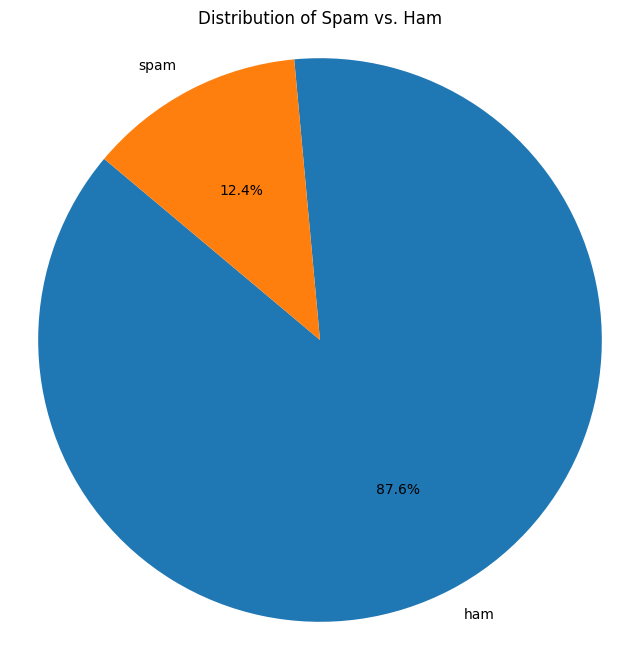

In [13]:
# Calculate the count of each label
category_counts = df['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#TEXT VISUALIZATION

- Iterate through unique categories: This loop iterates through each unique category in the 'Category' column of the DataFrame df.¶
- Filter the DataFrame for the current category: Inside the loop, the code filters the DataFrame df to create a new DataFrame filtered_df containing only the rows where the 'Category' column matches the current category.
- Concatenate all text data for the current category: The code then concatenates all the text data from the 'Message' column of filtered_df into a single string variable named text.
- Generate word cloud: Using the concatenated text data (text), the code generates a word cloud using the WordCloud module. The word cloud is configured to have a width of 800 pixels, a height of 400 pixels, and a white background.
- Plot the word cloud: Finally, the code plots the generated word cloud using Matplotlib. Each word's size in the word cloud is proportional to its frequency in the concatenated text data. The title of each word cloud plot includes the current category being processed. The plt.axis('off') command is used to hide the axes of the plot.
This process repeats for each unique category, generating a separate word cloud for each category based on the text data associated with that category.

In [14]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [15]:
filtered_df=df[df['Category']=='spam']
filtered_df

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [16]:
text = ' '.join(filtered_df['Message'])
text

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message o

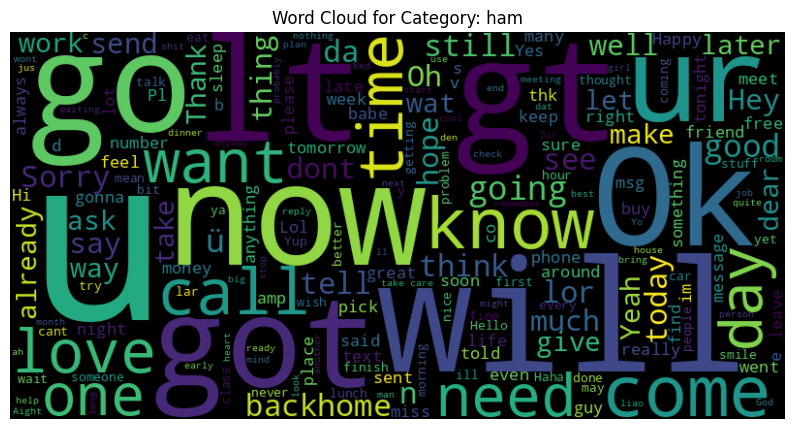

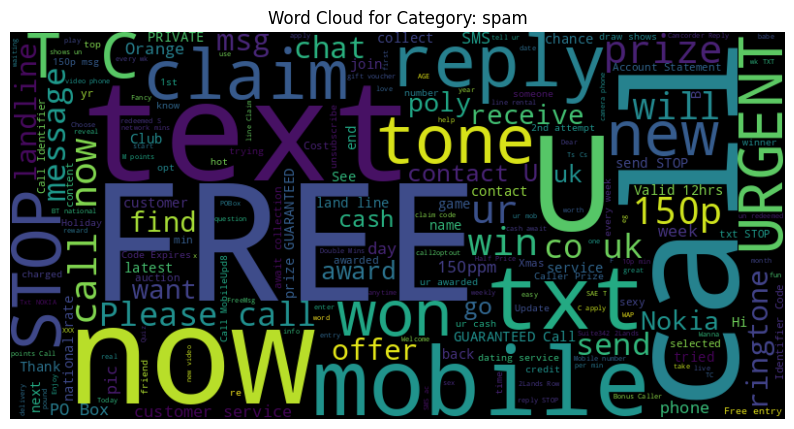

In [17]:
# Iterate through unique categories
for category in df['Category'].unique():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Category'] == category]

    # Concatenate all text data for the current category
    text = ' '.join(filtered_df['Message'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

In [18]:
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/19DvzV8ijhYquI6iYBtaGGg2NDO3Q0iPdvNuydJhCvDM/edit#gid=0


#Text Preprocessing

1. Lower Casing¶
2. Remove Extra White Spaces
3. Remove HTML Tags
4. Remove URLs
5. Remove Punctuations
6. Remove Special Characters
7. Remove Numeric Values
8. Remove Non-alpha Numeric

10. Handling StopWords¶
11. Handling Emojis
12. Stemming



In [21]:
# Convert 'Text' column to lowercase
df['Message'] = df['Message'].str.lower()
df['Message']

,Message
0,"go until jurong point, crazy.. available only ..."
1,ok lar... joking wif u oni...
2,free entry in 2 a wkly comp to win fa cup fina...
3,u dun say so early hor... u c already then say...
4,"nah i don't think he goes to usf, he lives aro..."
...,...
5567,this is the 2nd time we have tried 2 contact u...
5568,will ü b going to esplanade fr home?
5569,"pity, * was in mood for that. so...any other s..."
5570,the guy did some bitching but i acted like i'd...


In [22]:
# Remove extra white spaces from the 'Text' column
df['Message']= df['Message'].str.strip()
df

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ü b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


In [23]:
# Function to remove HTML tags from text
def remove_html_tags(text):
    return  BeautifulSoup(text, "html.parser").get_text()


# Remove HTML tags from 'Text' column
df['Message'] = df['Message'].apply(remove_html_tags)

df


,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ü b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


In [24]:


# Define a function to remove URLs using regular expressions
def remove_urls(text):
    return re.sub(r'http\S+|www\.\S+|https\S+', '', text)

# Apply the function to the 'Text' column
df['Message'] = df['Message'].apply(remove_urls)
df


,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ü b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


In [25]:


def remove_special_characters(text):
    # Define the pattern to match special characters
    return re.sub(r'[^A-Za-z0-9\s]','',text)

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_special_characters)
df


,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will b going to esplanade fr home
5569,0,pity was in mood for that soany other suggest...
5570,0,the guy did some bitching but i acted like id ...


In [26]:
# Function to remove numeric values from text
def remove_numeric(text):
    return re.sub('\d+','',text)

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_numeric)
df

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2887537369.py:3: SyntaxWarning: invalid escape sequence '\d'
  return re.sub('\d+','',text)


,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the nd time we have tried contact u u...
5568,0,will b going to esplanade fr home
5569,0,pity was in mood for that soany other suggest...
5570,0,the guy did some bitching but i acted like id ...


In [27]:


# Define a function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    return re.sub(r'[^A-Za-z0-9\s]','',text)
# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_non_alphanumeric)

df

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the nd time we have tried contact u u...
5568,0,will b going to esplanade fr home
5569,0,pity was in mood for that soany other suggest...
5570,0,the guy did some bitching but i acted like id ...


In [28]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [29]:
chat_words = {k.lower(): v for k, v in chat_words.items()}
chat_words

{'afaik': 'As Far As I Know',
 'afk': 'Away From Keyboard',
 'asap': 'As Soon As Possible',
 'atk': 'At The Keyboard',
 'atm': 'At The Moment',
 'a3': 'Anytime, Anywhere, Anyplace',
 'bak': 'Back At Keyboard',
 'bbl': 'Be Back Later',
 'bbs': 'Be Back Soon',
 'bfn': 'Bye For Now',
 'b4n': 'Bye For Now',
 'brb': 'Be Right Back',
 'brt': 'Be Right There',
 'btw': 'By The Way',
 'b4': 'Before',
 'cu': 'See You',
 'cul8r': 'See You Later',
 'cya': 'See You',
 'faq': 'Frequently Asked Questions',
 'fc': 'Fingers Crossed',
 'fwiw': "For What It's Worth",
 'fyi': 'For Your Information',
 'gal': 'Get A Life',
 'gg': 'Good Game',
 'gn': 'Good Night',
 'gmta': 'Great Minds Think Alike',
 'gr8': 'Great!',
 'g9': 'Genius',
 'ic': 'I See',
 'icq': 'I Seek you (also a chat program)',
 'ilu': 'ILU: I Love You',
 'imho': 'In My Honest/Humble Opinion',
 'imo': 'In My Opinion',
 'iow': 'In Other Words',
 'irl': 'In Real Life',
 'kiss': 'Keep It Simple, Stupid',
 'ldr': 'Long Distance Relationship',
 'lm

In [30]:
# Function to replace chat words with their full forms
def replace_chat_words(text):

    if text is None:
        print("empty")
    text=text.split()
    for i in range(len(text)):
        text[i]=chat_words.get(text[i],text[i])

    return ' '.join(text)

# Apply replace_chat_words function to 'Text' column
df['Message'] = df['Message'].apply(replace_chat_words)
df['Message']=df['Message'].str.lower()
df

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif you oni
2,1,free entry in a wkly comp to win fa cup final ...
3,0,you dun say so early hor you c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the nd tears in my eyes we have tried ...
5568,0,will b going to esplanade fr home
5569,0,pity was in mood for that soany other suggestions
5570,0,the guy did some bitching but i acted like id ...


In [31]:


# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Message'] = df['Message'].apply(remove_stopwords)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
df['Message'] = df['Message'].apply(remove_emojis)


In [33]:
# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Message_stemmed'] = df['Message'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))
df


,Category,Message,Message_stemmed
0,0,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif oni,ok lar joke wif oni
2,1,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkt st m...
3,0,dun say early hor c already say,dun say earli hor c alreadi say
4,0,nah dont think goes usf lives around though,nah dont think goe usf live around though
...,...,...,...
5567,1,nd tears eyes tried contact pound prize claim ...,nd tear eye tri contact pound prize claim easi...
5568,0,b going esplanade fr home,b go esplanad fr home
5569,0,pity mood soany suggestions,piti mood soani suggest
5570,0,guy bitching acted like id interested buying s...,guy bitch act like id interest buy someth els ...


In [34]:
#Convert text to numbers using bag of words
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']


In [35]:
np.set_printoptions(threshold=np.inf)
print(vectorizer.get_feature_names_out())

['aa' 'aah' 'aaniy' 'aaooooright' 'aathilov' 'aathiwher' 'ab' 'abbey'
 'abdomen' 'abeg' 'abelu' 'aberdeen' 'abi' 'abil' 'abiola' 'abj' 'abl'
 'abnorm' 'abouta' 'abroad' 'absenc' 'absolut' 'abstract' 'abt' 'abta'
 'aburo' 'abus' 'ac' 'academ' 'acc' 'accent' 'accentur' 'accept' 'access'
 'accid' 'accident' 'accommod' 'accommodationvouch' 'accomod' 'accordin'
 'accordingli' 'accordinglyor' 'account' 'accumul' 'ach'
 'achanammarakheshqatar' 'achiev' 'acid' 'acknowledg' 'aclpm' 'acnt'
 'acoentri' 'across' 'acsmsreward' 'act' 'actin' 'action' 'activ' 'actor'
 'actual' 'acwicmbcktzr' 'ad' 'adam' 'add' 'addamsfa' 'addi' 'addict'
 'address' 'addressul' 'adewal' 'adi' 'adjust' 'admin' 'administr' 'admir'
 'admiss' 'admit' 'admiti' 'ador' 'adp' 'adress' 'adrian' 'adrink'
 'adsens' 'adult' 'advanc' 'adventur' 'advic' 'advis' 'advisor' 'ae'
 'aeronaut' 'aeroplan' 'afew' 'affair' 'affect' 'affection' 'affidavit'
 'afford' 'afghanistan' 'afraid' 'africa' 'african' 'aft' 'afternon'
 'afternoon' 'after

In [36]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify= y)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)
print(y.shape)

(4125, 7053)
(1032, 7053)
(4125,)
(1032,)
(5157, 7053)
(5157,)


#NAIVE BAYES IMPLEMENTATION USING COUNTVECTOR

In [38]:
probVectorSpam=(np.sum(X_train[y_train==1],axis=0)+1)/(np.sum(X_train[y_train==1])+X_train.shape[1])

probVectorHam=(np.sum(X_train[y_train==0],axis=0)+1)/(np.sum(X_train[y_train==0])+X_train.shape[1])

probSpam=np.sum(y_train)/y_train.shape[0]

print(np.sum(probVectorSpam),np.sum(probVectorHam))

1.0 1.0


In [39]:
print(X_test.shape,probVectorHam.shape,(X_test**probVectorSpam).shape)

(1032, 7053) (7053,) (1032, 7053)


In [40]:
SpamScore=np.log(probSpam)+(np.sum(X_test*np.log(probVectorSpam),axis=-1))
HamScore=np.log(1-probSpam)+(np.sum(X_test*np.log(probVectorHam),axis=-1))

pred=np.argmax(np.array([HamScore,SpamScore]),axis=0)
# print(pred.shape)

print("acc",(pred==y_test).sum()/y_test.shape[0])

acc 0.9583333333333334


In [41]:
from sklearn.metrics import classification_report, accuracy_score,roc_curve,auc,confusion_matrix,ConfusionMatrixDisplay

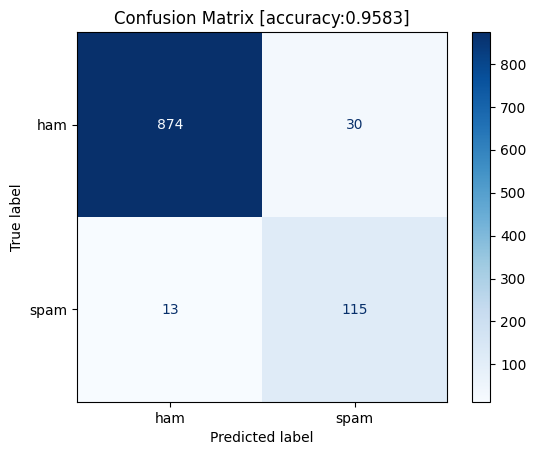

In [42]:
cm = confusion_matrix(y_test, pred)

# Plot using sklearn's built-in display
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['ham','spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix [accuracy:{((pred==y_test).sum()/pred.shape[0]):.4f}]")
plt.savefig("ConfusionMatrix.jpg")

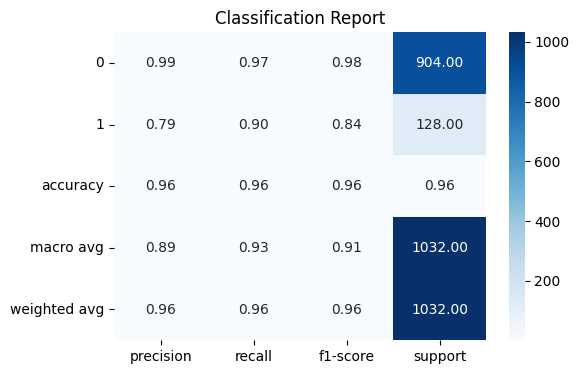

In [43]:
import seaborn as sns

report=classification_report(y_test,pred,output_dict=True)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(6,4))
sns.heatmap(df, annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report")
plt.show()